In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
N = 20
X = torch.rand(N)  # 生成n个随机数,0-1
k = 2
b = 3
Y = k * X + b + torch.randn(N) * 0.02  # 噪声用randn，正态分布

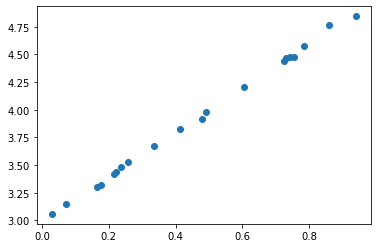

In [3]:
plt.scatter(X, Y)  # 快速画图

In [4]:
w_k = torch.rand(1)
w_k.requires_grad = True
w_b = torch.rand(1)
w_b.requires_grad = True
w_k, w_b

(tensor([0.4969], requires_grad=True), tensor([0.7788], requires_grad=True))

In [5]:
lr = 0.02

In [6]:
for i in range(1000):
    # calc y_hat
    y_hat = w_k * X + w_b
    # calc loss
    loss = ((y_hat - Y)**2).mean()  # 求数组平均值
    # backward, update grad
    loss.backward()
    # update w_k, w_b
    w_k.data = w_k.data - lr * w_k.grad.data
    w_b.data = w_b.data - lr * w_b.grad.data
    # clear grad
    w_b.grad.data = torch.zeros(1)
    w_k.grad.data = torch.zeros(1)
    pass

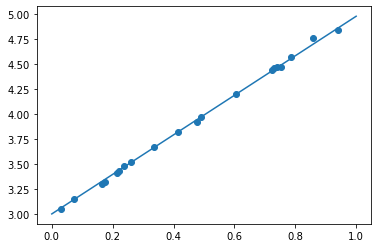

In [7]:
test_x = torch.linspace(0, 1, 100)
test_y = test_x * w_k.detach() + w_b.detach()  # .detach() == .data
plt.plot(test_x, test_y)
plt.scatter(X, Y)

In [8]:
w_k.data, w_b.data

(tensor([1.9757]), tensor([3.0053]))

In [9]:
w_k.grad, w_b.grad

(tensor([0.]), tensor([0.]))